In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 39134 files belonging to 21 classes.
Found 9783 files belonging to 21 classes.


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobnet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

In [ ]:
model = keras.Sequential()

model.add(mobnet)



model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(21,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 65536)            262144    
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 65536)             0         
                                                                 
 dense_1 (Dense)             (None, 21)                1376277   
                                                                 
Total params: 4,867,285
Trainable params: 4,714,325
No

In [ ]:
ep = 2
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/2
1223/1223 [==============================] - 12081s 10s/step - loss: 0.3473 - accuracy: 0.8966 - val_loss: 0.1141 - val_accuracy: 0.9668
Epoch 2/2
1223/1223 [==============================] - 11043s 9s/step - loss: 0.0813 - accuracy: 0.9749 - val_loss: 0.1056 - val_accuracy: 0.9714


In [ ]:
model.save('/content/drive/My Drive/pd_h5/pd_simple.h5')

In [ ]:
# If want to train more
model_1 = keras.models.load_model('/content/drive/My Drive/pd_h5/pd_simple.h5')

In [ ]:
ep = 2
history = model_1.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/2
1223/1223 [==============================] - 17000s 14s/step - loss: 0.0660 - accuracy: 0.9806 - val_loss: 0.1487 - val_accuracy: 0.9693
Epoch 2/2
1223/1223 [==============================] - 10270s 8s/step - loss: 0.0701 - accuracy: 0.9811 - val_loss: 0.1176 - val_accuracy: 0.9767


In [ ]:
model_1.save('/content/drive/My Drive/pd_h5/pd_mb_4e.h5')

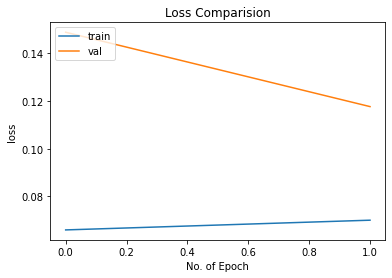

In [ ]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



NameError: ignored

# **4e - 6e**

In [ ]:
model_2 = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_mb_4e.h5')

In [ ]:
ep = 2
history = model_2.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/2
1223/1223 [==============================] - 10757s 9s/step - loss: 0.3473 - accuracy: 0.0503 - val_loss: 0.1141 - val_accuracy: 0.0513
Epoch 2/2
 423/1223 [=========>....................] - ETA: 1:43:31 - loss: 0.0873 - accuracy: 0.0511

KeyboardInterrupt: ignored

In [ ]:
model_2.save('/content/drive/My Drive/pd_h5/pd_mb_6e.h5_')

In [ ]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



# **Model Test**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  


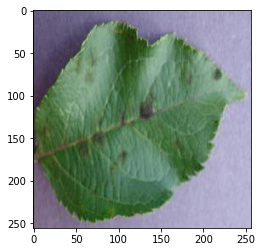

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
plt.imshow(img3)

In [ ]:
disease = np.argmax(model_2.predict(img4),axis=1)
print(disease[0])

7


In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
# print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 6.84 %
Precision Score : 6.84 %
Recall Score    : 6.84 %
